In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### 1. Importing and exploring the dataset

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(299, 13)

**Note:**
We have 299 rows and 13 columns

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# We split our dataset into two categories to make it easier for analysis

categorical_data = data[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]]
continuous_data = data[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

**Notes for categorical data:**

  Anaemia: 0 means that the person does not have anaemia, if 1 it does. 
  
  Diabetes: 0 means that the person does not have diabetes, if 1 it does. 
  
  High_blood_pressure: 0 means that the person does not have high_blood_pressure, if 1 it does. 
  
  Smoking: 0 means that the person does not smoke, if 1 it smokes. 
  
  Sex: 0 for female, 1 for male.
  
  DEATH_EVENT: 0 means heart failure is not the cause of death, 1 means it is.

In [8]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Note :**
We can see that there is no missing data in our dataset. 

In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Note:**
We can deduce that the dataset does not contain null values. 

In [10]:
"""
describe() function helps us with the descriptive statistics. 
For example we have the minimum age is 40 and the maximum is 95 with a mean of 60.834,
for the same variable, we have the median is 60, standard deviation is 11.895 ...
"""
continuous_data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


**Note:**

Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT, and we can deduce that our dataset is unbalanced, because we have the total deaths(96) is less than half of the total persons that did not die because of heart failure(203).

In [12]:
age = data[["age"]]
platelets = data[["platelets"]]

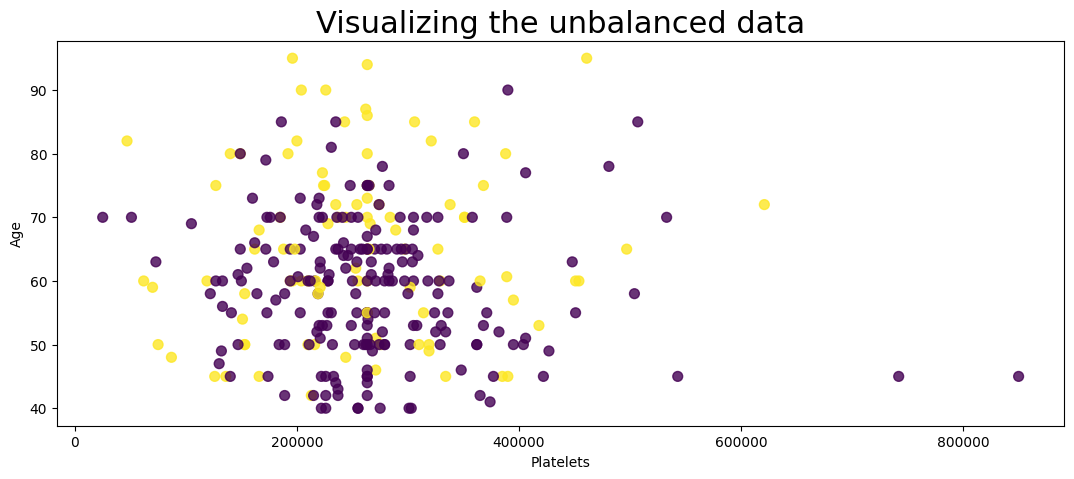

In [13]:
# Visualizing the unbalanced data with a scatter plot, the colors will depend on DEATH_EVENT (0 or 1)
plt.figure(figsize=(13,5))
plt.scatter(platelets, age, c = data["DEATH_EVENT"], s=50, alpha=0.8)
plt.xlabel("Platelets",fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

**Note:**
We can see that we do have more circles in purple than in yellow

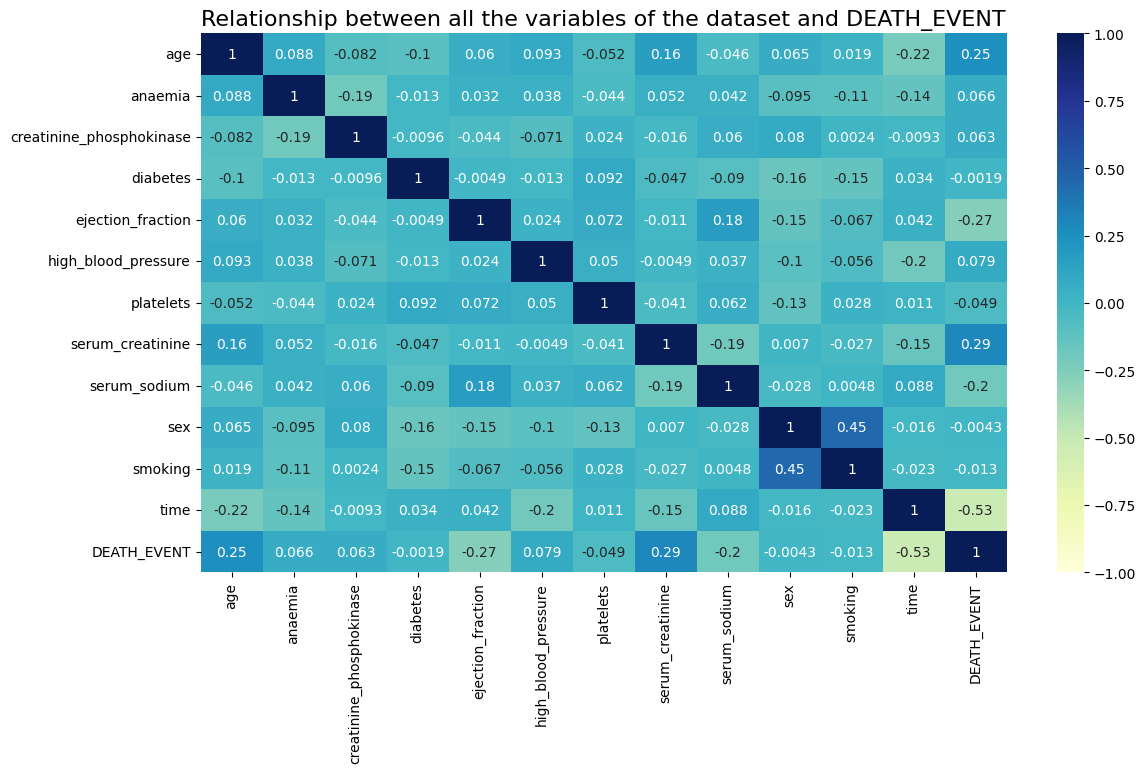

In [14]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize=16)
plt.show()

In [15]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


**Note:**

We notice that there is a positive correlation between DEATH_EVENT and serum_creatinine and age. We have also a negative correlation between DEATH_EVENT and time, ejection fraction and serum_sodium a little bit. 

#### 2. Data Visualization

In [16]:
categorical_variables = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
continuous_variables = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

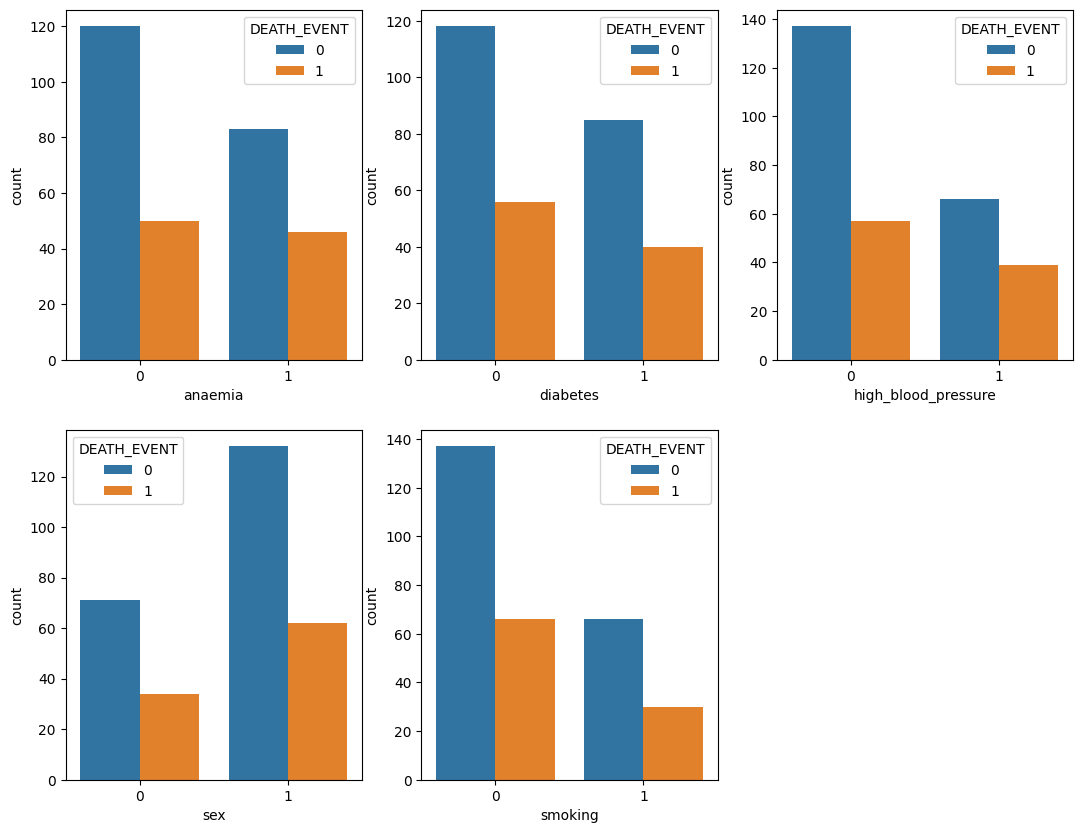

In [17]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i, cat in enumerate(categorical_data):
    plt.subplot(2, 3, i+1)
    sns.countplot(data = data, x = cat, hue = "DEATH_EVENT")
plt.show()

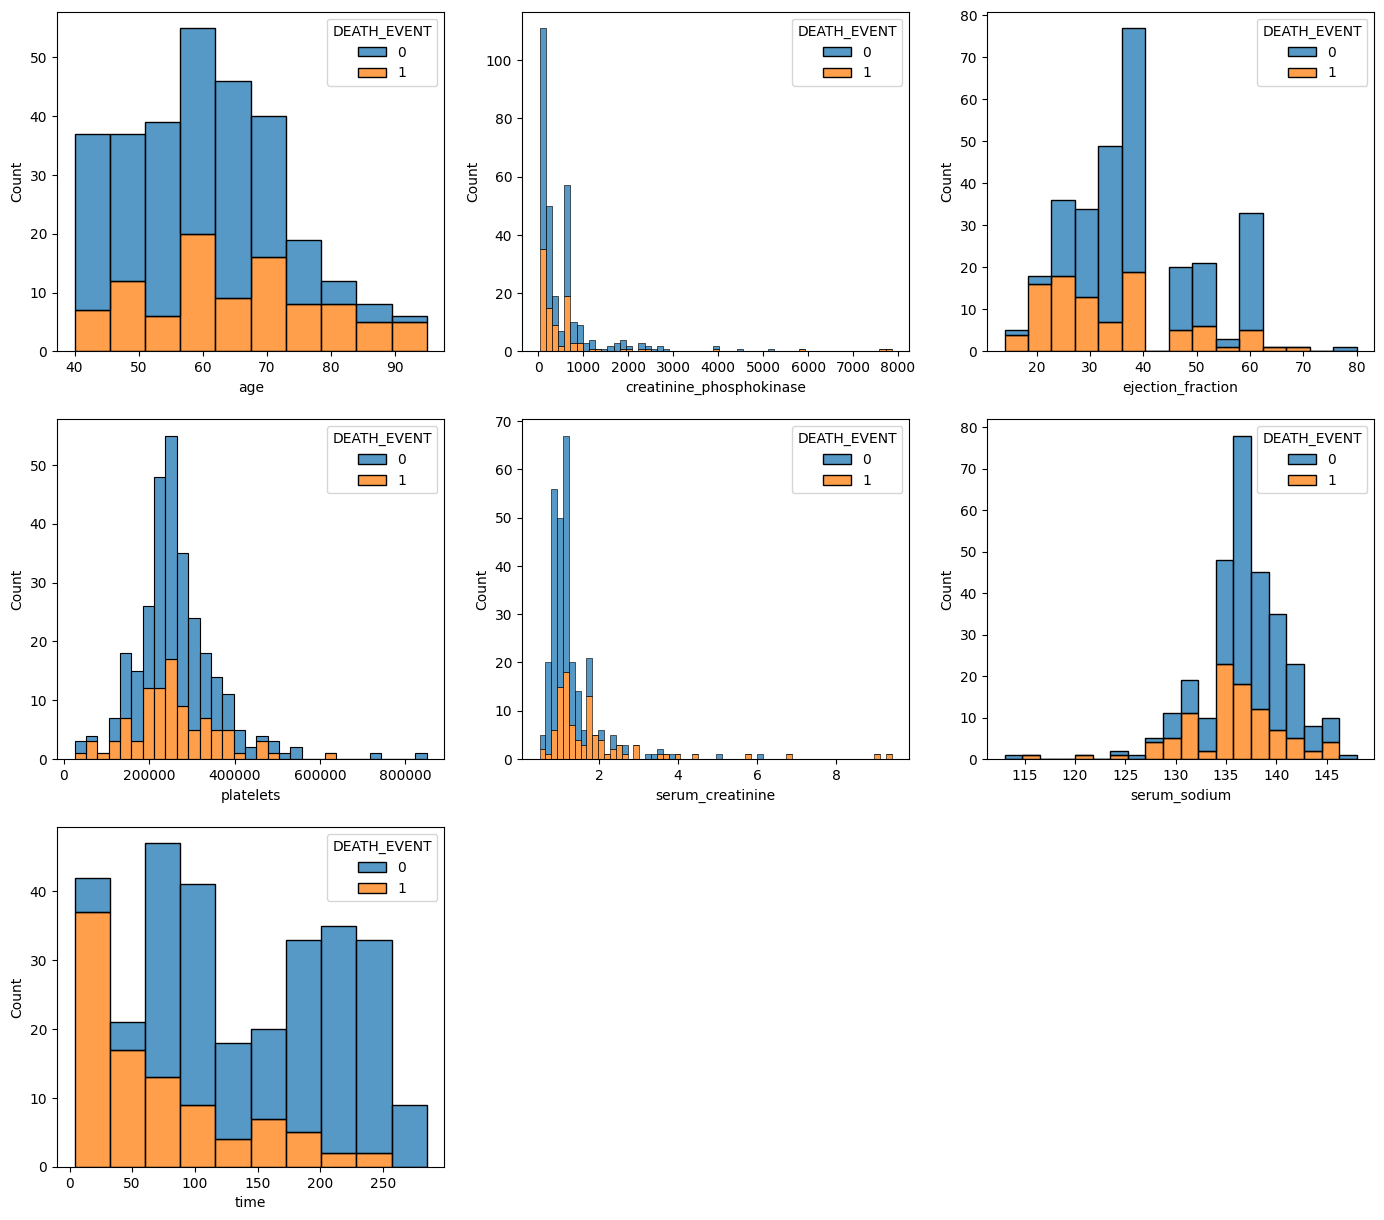

In [18]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j, con in enumerate(continuous_variables):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x = con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

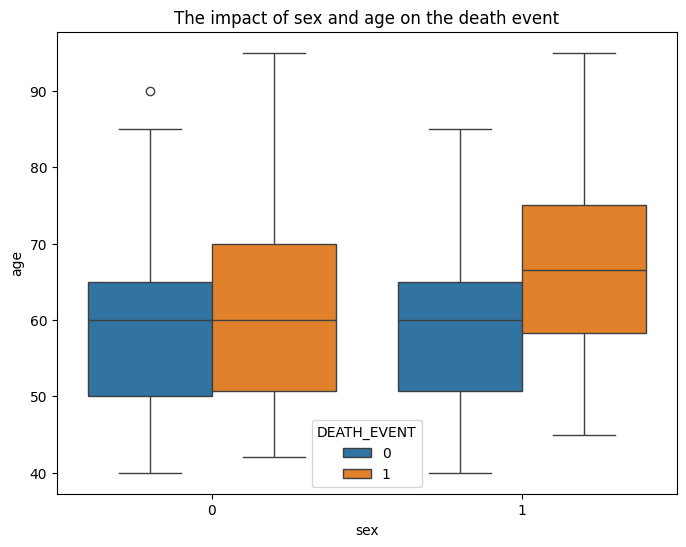

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the death event")
plt.show()

In [20]:
# Analyzing the survival status on smoking
smokers = data[data['smoking']==1]
non_smokers = data[data['smoking']==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

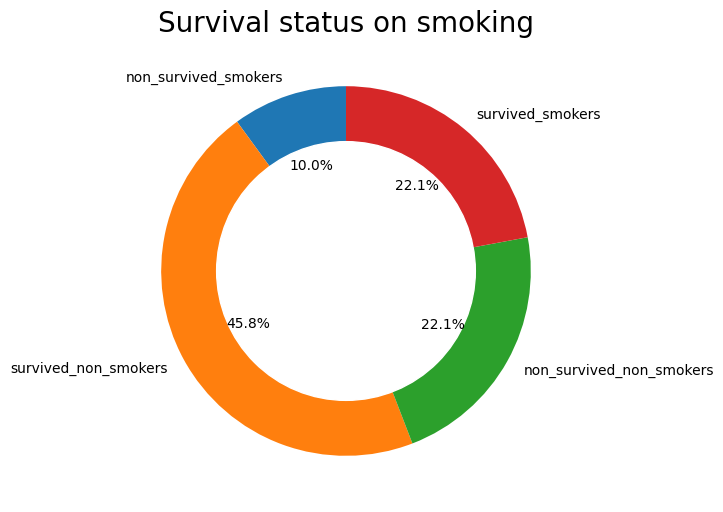

In [21]:
smoking_data = [len(non_survived_smokers), len(survived_non_smokers), len(non_survived_non_smokers), len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize=(6,6))
plt.pie(smoking_data, labels=smoking_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=20)
plt.show()

In [22]:
# Analyzing the survival status on sex
male = data[data['sex']==1]
female = data[data['sex']==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]

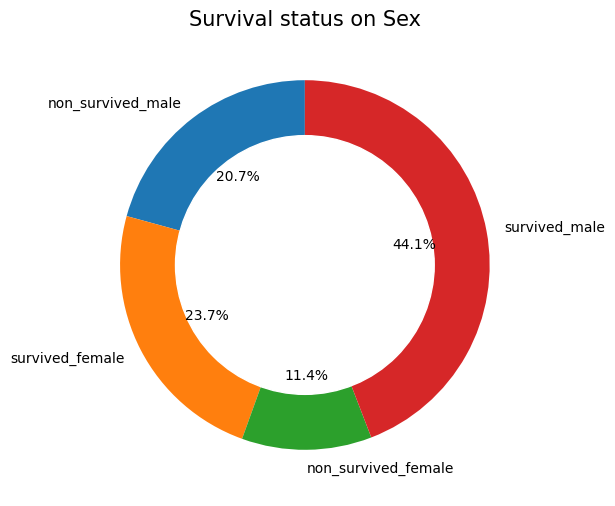

In [23]:
sex_data = [len(non_survived_male), len(survived_female), len(non_survived_female), len(survived_male)]
sex_labels = ["non_survived_male", "survived_female", "non_survived_female", "survived_male"]

plt.figure(figsize=(6,6))
plt.pie(sex_data, labels=sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on Sex", fontsize=15)
plt.show()

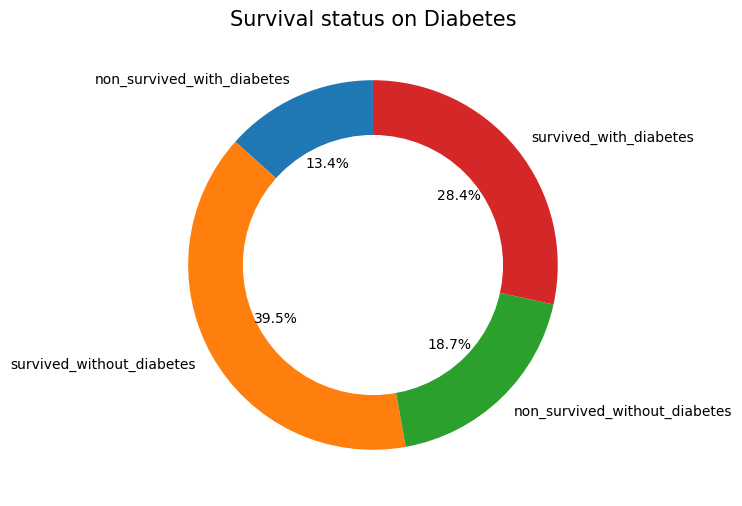

In [28]:
# Analyzing the survival status on diabetes
with_diabetes = data[data['diabetes']==1]
without_diabetes = data[data['diabetes']==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(non_survived_with_diabetes), len(survived_without_diabetes), len(non_survived_without_diabetes), len(survived_with_diabetes)]
diabetes_labels = ["non_survived_with_diabetes", "survived_without_diabetes", "non_survived_without_diabetes", "survived_with_diabetes"]

plt.figure(figsize=(6,6))
plt.pie(diabetes_data, labels=diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on Diabetes", fontsize=15)
plt.show()

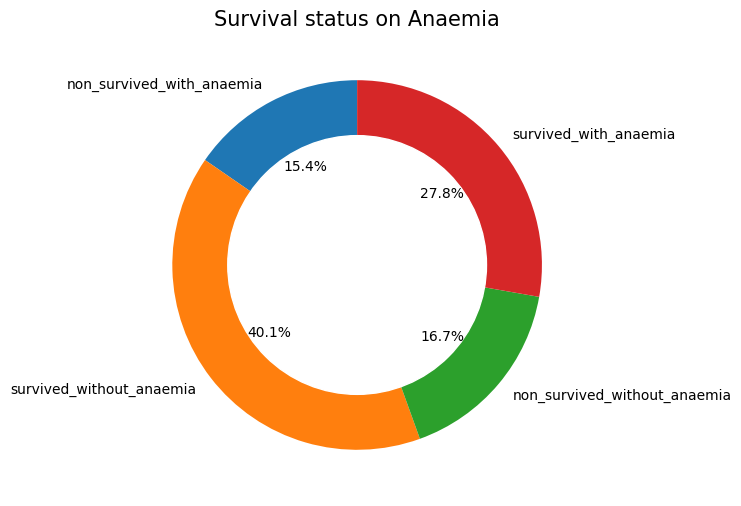

In [29]:
# Analyzing the survival status on anaemia
with_anaemia = data[data['anaemia']==1]
without_anaemia = data[data['anaemia']==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_without_anaemia), len(non_survived_without_anaemia), len(survived_with_anaemia)]
anaemia_labels = ["non_survived_with_anaemia", "survived_without_anaemia", "non_survived_without_anaemia", "survived_with_anaemia"]

plt.figure(figsize=(6,6))
plt.pie(anaemia_data, labels=anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on Anaemia", fontsize=15)
plt.show()

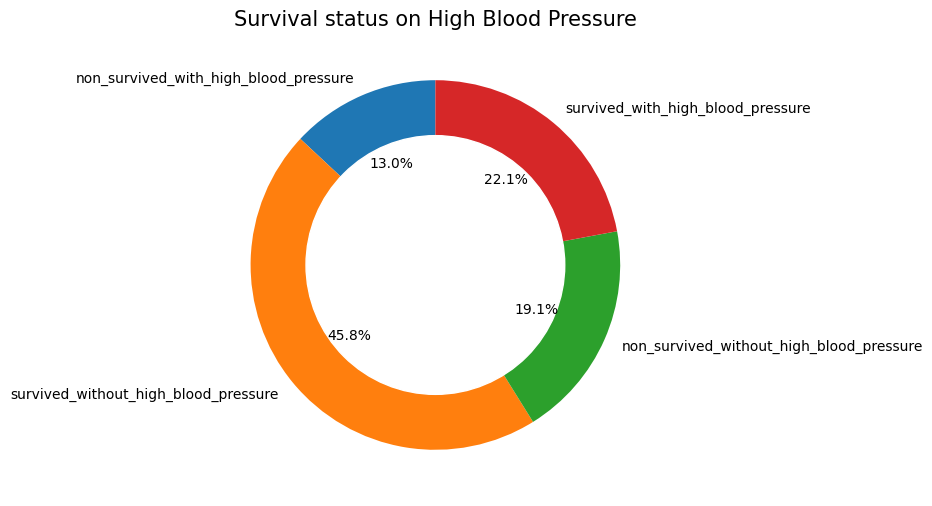

In [31]:
# Analyzing the survival status on high blood pressure
with_high_blood_pressure = data[data['high_blood_pressure']==1]
without_high_blood_pressure = data[data['high_blood_pressure']==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_without_high_blood_pressure), len(non_survived_without_high_blood_pressure), len(survived_with_high_blood_pressure)]
high_blood_pressure_labels = ["non_survived_with_high_blood_pressure", "survived_without_high_blood_pressure", "non_survived_without_high_blood_pressure", "survived_with_high_blood_pressure"]

plt.figure(figsize=(6,6))
plt.pie(high_blood_pressure_data, labels=high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on High Blood Pressure", fontsize=15)
plt.show()

#### 3. Data Modeling and prediction using continuous data:

In [32]:
x = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', "time"]]
y = data["DEATH_EVENT"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [34]:
# Data Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
accuracy_list = [] # A list to save all the values from different models accuracy for comparaison using a bar chart

#### 3.1 Logistic Regression

In [36]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) # percentage
accuracy_list.append(lr_accuracy)

#### 3.2 Support Vector Machine

In [37]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
svm_prediction = svm_model.predict(x_test_scaled)
svm_accuracy = (round(accuracy_score(svm_prediction, y_test), 4) * 100) # percentage
accuracy_list.append(svm_accuracy)

#### 3.3 K Nearest Neighbors

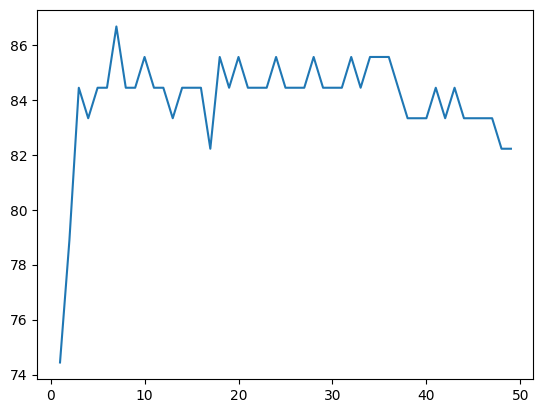

In [39]:
# We use this program to find the optimal value of k
knn_list = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4)*100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)
plt.show()

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) # percentage
accuracy_list.append(knn_accuracy)

#### 3.4 Decison Tree Classifier

In [41]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) # percentage
accuracy_list.append(dt_accuracy)

#### 3.5 Naive Bayes

In [42]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) # percentage
accuracy_list.append(nb_accuracy)

#### 3.6 Random Forest Classifier

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) # percentage
accuracy_list.append(rf_accuracy)

In [44]:
accuracy_list

[87.78, 84.44, 84.44, 88.89, 82.22, 86.67]

In [45]:
models = ["Logistic Regression", "SVC", "KNearestNeighbors", "Decision Tree", "Naive Bayes", "Random Forest"]

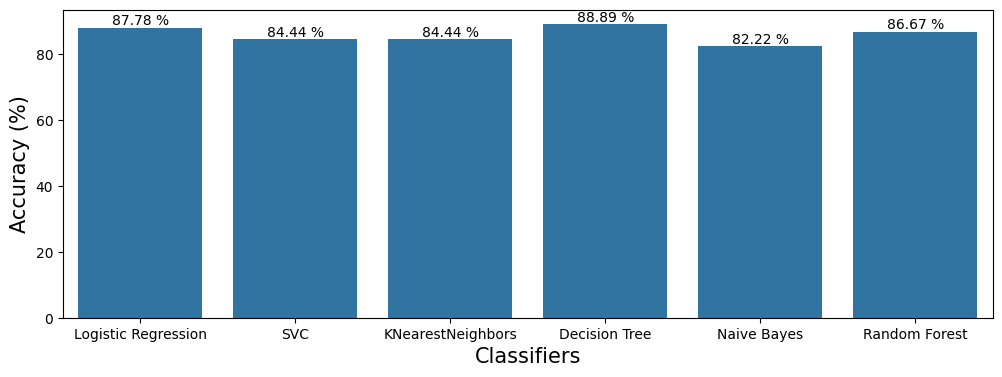

In [47]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()